In [ ]:
#importing libraries for our purpose

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
! gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 16.3MB/s]


In [197]:
df = pd.read_csv('netflix.csv')
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# lenght of dataset

len(df)

8807

In [ ]:
# Checking for info like non-nulls and Dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#no of numique values in our data

for i in df.columns:
  print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [ ]:
# checking null values in every coulumns of our data

df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
#checking the occurences of each of the ratings
df['rating'].value_counts()

,count
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [ ]:
col1 = df['director'].apply(lambda x:str(x).split(", ")).to_list()
col1

[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 

In [ ]:
df_new1 = pd.DataFrame(col1,index=df['title'])
df_new1

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
#unnesting the directors column, i.e- creating separate lines for each director in a movie
constraint1 = df['director'].apply(lambda x:str(x).split(', ')).tolist()
df_new1 = pd.DataFrame(constraint1,index=df['title'])
df_new1 = df_new1.stack()
df_new1 = pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'}, inplace=True)
df_new1.drop(columns='level_1',inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
#unnesting the directors column, i.e- creating separate lines for each director in a movie
constraint1 = df['director'].apply(lambda x:str(x).split(', ')).tolist()
df_new1 = pd.DataFrame(constraint1,index=df['title'])
df_new1 = df_new1.stack()
df_new1 = pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Directors'}, inplace=True)
df_new1.drop(columns='level_1',inplace=True)
df_new1.head()

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [ ]:
#unnesting the Actors column, i.e- creating separate lines for each director in a movie
constraint2 = df['cast'].apply(lambda x:str(x).split(', ')).tolist()
df_new2 = pd.DataFrame(constraint2,index=df['title'])
df_new2 = df_new2.stack()
df_new2 = pd.DataFrame(df_new2.reset_index())
df_new2.drop(columns='level_1',inplace=True)
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2.head()

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
#unnesting the Gener column, i.e- creating separate lines for each director in a movie
constraint3 = df['listed_in'].apply(lambda x:str(x).split(", ")).tolist()
df_new3 = pd.DataFrame(constraint3,index=df['title'])
df_new3 = df_new3.stack()
df_new3 = pd.DataFrame(df_new3.reset_index())
df_new3.rename(columns={0:'Gener'},inplace=True)
df_new3.drop(columns='level_1',inplace=True)

In [ ]:
df_new3.head()

,title,Gener
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#unnesting the Gener column, i.e- creating separate lines for each director in a movie
constraint4 = df['country'].apply(lambda x:str(x).split(", ")).tolist()
df_new4 = pd.DataFrame(constraint4,index=df['title'])
df_new4 = df_new4.stack()
df_new4 = pd.DataFrame(df_new4.reset_index())
df_new4.rename(columns={0:'country'},inplace=True)
df_new4.drop(columns='level_1',inplace=True)
df_new4.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [ ]:
df_new5 = df_new2.merge(df_new1,on=['title'],how='inner')
df_new6 = df_new5.merge(df_new3,on=['title'],how='inner')
df_new = df_new6.merge(df_new4,on=['title'],how='inner')

In [ ]:
df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['Directors'].replace(['nan'],['Unknown Director'],inplace=True)
df_new.head()

<ipython-input-19-317b8cf51823>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
<ipython-input-19-317b8cf51823>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,title,Actors,Directors,Gener,country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa


In [ ]:
df_new['country'].replace(['nan'],np.nan,inplace=True)

<ipython-input-20-091bddf5dacc>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_new['country'].replace(['nan'],np.nan,inplace=True)


In [ ]:
df_new.head()

,title,Actors,Directors,Gener,country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df_final = df_new.merge(df[['show_id', 'type','title','date_added',
                            'release_year','rating','duration']],on=['title'],how='left')
df_final.head()

,title,Actors,Directors,Gener,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final.isnull().sum()

,0
title,0
Actors,0
Directors,0
Gener,0
country,11897
show_id,0
type,0
date_added,158
release_year,0
rating,67


In duration column, it was observed that the nulls had values which were written in corresponding ratings column, i.e- you can't expect ratings to be in min. So the duration column nulls are replaced by corresponding values in ratings column

In [ ]:
#df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])

In [ ]:
df_final.loc[df_final['duration'].isnull(),'duration'] = df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])

In [ ]:
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating'] = 'NR'
df_final.isnull().sum()

,0
title,0
Actors,0
Directors,0
Gener,0
country,11897
show_id,0
type,0
date_added,158
release_year,0
rating,67


In [ ]:
#Ratings can't be in min, so it has been made NR(i.e- Non Rated)

df_final.loc[df_final['rating'].str.contains('min',na=False),'rating'] = 'NR'
df_final['rating'] = df_final['rating'].fillna('NR')
pd.set_option('display.max_rows',None)

In [ ]:
df_final.isnull().sum()

,0
title,0
Actors,0
Directors,0
Gener,0
country,11897
show_id,0
type,0
date_added,158
release_year,0
rating,0


In [ ]:
#just an attempt to observe nulls in date_added column
df_final[df_final['date_added'].isnull()].head()

,title,Actors,Directors,Gener,country,show_id,type,date_added,release_year,rating,duration
136893,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136894,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136895,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,Unknown Director,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136896,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136897,A Young Doctor's Notebook and Other Stories,Jon Hamm,Unknown Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons


In [ ]:
#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added
#when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
# and imputes in place of nulls the corresponding mode

for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
  imp = df_final[df_final['release_year']==i]['date_added'].mode().values[0]
  df_final.loc[df_final['release_year']==i,'date_added'] = df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [ ]:
#country column is imputed on the basis of director,i.e- suppose there's a null for country
#when we have a director whose other movies have a country given.So below piece of code just checks the mode of
#country for the director
# and imputes in place of nulls the corresponding mode

for i in df_final[df_final['country'].isnull()]['Directors'].unique():
  if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
    imp=df_final[df_final['Directors']==i]['country'].mode().values[0]
    df_final.loc[df_final['Directors']==i,'country']=df_final.loc[df_final['Directors']==i,'country'].fillna(imp)

So we imputed the country column on the basis of directors whose other movie titles had countries given. But there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a basis. i.e- for this Actor majorly acts in movies of which country? Imputation has been done on this basis. For remaining rows, country has been filled as Unknown Country

In [ ]:
#If there are still nulls, I just replace it by Unknown Country
df_final['country'].fillna('Unknown Country',inplace=True)
df_final.isnull().sum()

<ipython-input-34-b8d8c5067f99>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_final['country'].fillna('Unknown Country',inplace=True)


,0
title,0
Actors,0
Directors,0
Gener,0
country,0
show_id,0
type,0
date_added,0
release_year,0
rating,0


In [ ]:
df_final.head()

,title,Actors,Directors,Gener,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final['duration'].value_counts()

,count
duration,
1 Season,35035
2 Seasons,9559
3 Seasons,5084
94 min,4343
106 min,4040
97 min,3624
95 min,3560
96 min,3484
93 min,3480


In [ ]:
#removing mins from data
df_final['duration'] = df_final['duration'].str.replace(' min',"")
df_final.head()

,title,Actors,Directors,Gener,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df_final['duration_copy'] = df_final['duration'].copy()
df_final1=df_final.copy()

In [ ]:
df_final.loc[df_final['duration_copy'].str.contains('Seasons'),'duration_copy']



df_final1.loc[df_final1['duration_copy'].str.contains('Season'),'duration_copy']=0
df_final1['duration_copy']=df_final1['duration_copy'].astype('int')
df_final1.head()

,title,Actors,Directors,Gener,country,show_id,type,date_added,release_year,rating,duration,duration_copy
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0


In [ ]:
#Visual Analysis - Univariate, Bivariate after pre-processing of the data

#Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

In [204]:
df_final1['duration_copy'].describe()

,duration_copy
count,201991.000000
mean,77.152789
std,52.269154
min,0.000000
25%,0.000000
50%,95.000000
75%,112.000000
max,312.000000


In [205]:
#df_final1['duration'].value_counts()

In [210]:
# Define bins and labels
bins1 = [-1, 1, 50, 80, 100, 120, 150, 200, 315]
labels1 = ['<1', '1-50', '50-80', '80-100', '100-120', '120-150', '150-200', '200-315']

# Apply pd.cut to categorize 'duration_copy' column
df_final1['duration_copy'] = pd.cut(df_final1['duration_copy'], bins=bins1, labels=labels1)

# Display the first few rows of the dataframe
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy,release_Date
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,80-100,2021-09-25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,<1,2021-09-24


In [215]:

#df_final1.loc[~df_final1['duration'].str.contains('Season'), 'duration_copy']

In [212]:
# Replace 'duration' values that do not contain 'Season'
df_final1.loc[~df_final1['duration'].str.contains('Season'), 'duration'] = df_final1.loc[~df_final1['duration'].str.contains('Season'), 'duration_copy']

# Drop the 'duration_copy' column
df_final1.drop(['duration_copy'], axis=1, inplace=True)

# Display the first few rows
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,release_Date
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24


In [ ]:
df_final1['release_Date'] = pd.to_datetime(df_final1['date_added'].str.strip(), format="%B %d, %Y")

In [ ]:
df_final1

Buffered data was truncated after reaching the output size limit.

In [ ]:
df_final1.dtypes

,0
title,object
Actors,object
Directors,object
Gener,object
country,object
show_id,object
type,object
date_added,object
release_year,int64
rating,object


In [ ]:
# changing the name of the column from "Gener":"Genre"

df_final1.rename(columns = {"Gener":"Genre"},inplace=True)

In [144]:
df_final1.groupby(['Genre']).agg({"title": "nunique"}).reset_index().sort_values(by='title', ascending=False).head(10)

,Genre,title
16,International Movies,2752
12,Dramas,2427
7,Comedies,1674
17,International TV Shows,1351
10,Documentaries,869
0,Action & Adventure,859
34,TV Dramas,763
15,Independent Movies,756
4,Children & Family Movies,641
24,Romantic Movies,616


It is clear that **international movies** are top with *2752* and 2nd top is **Dramas** and then**Comedy**

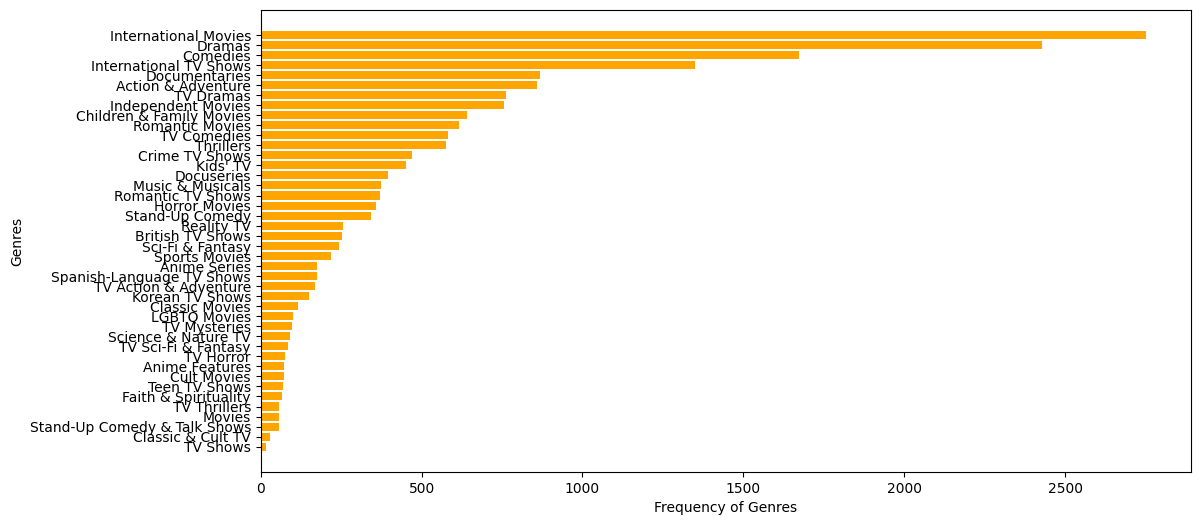

In [137]:
#The code groups data by genres, calculates the number of unique titles per genre, sorts them in descending order, and
#visualizes the results as a horizontal bar chart with genres on the y-axis and their frequencies on the x-axis.

df_genre = df_final1.groupby(['Genre']).agg({"title": "nunique"}).reset_index().sort_values(by='title', ascending=False)
plt.figure(figsize=(12,6))
plt.barh(df_genre[::-1]['Genre'], df_genre[::-1]['title'],color=['orange'])
plt.xlabel('Frequency of Genres')
plt.ylabel('Genres')
plt.show()

In [155]:
#number of distinct titles on the basis of type

df_final1.groupby(['type']).agg({'title':'nunique'})

,title
type,
Movie,6131
TV Show,2676


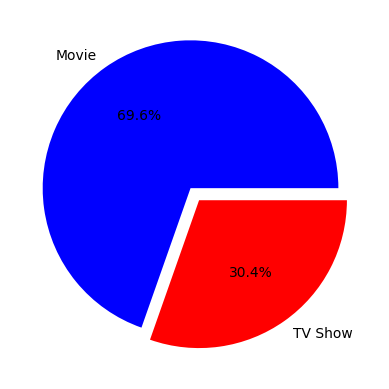

In [163]:
df_type = df_final1.groupby(['type']).agg({'title':'nunique'}).reset_index()
plt.pie(df_type['title'],explode=(0.05,0.05),labels=df_type['type'],colors=['blue','red'],autopct='%1.1f%%')
plt.show()

The **movies** are top in *Netflix* than **TV shows**

In [169]:
df_final1['country'] = df_final1['country'].str.replace(',', '')
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy,release_Date
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90,2021-09-25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24


In [166]:
#number of distinct titles on the basis of country
df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values("title",ascending=False).head(10)


,country,title
119,United States,4132
47,India,1116
117,United Kingdom,809
22,Canada,448
38,France,396
55,Japan,326
121,Unknown Country,260
105,Spain,234
103,South Korea,233
40,Germany,227


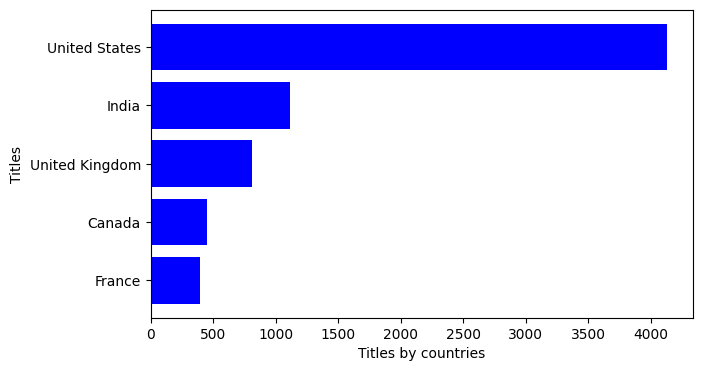

In [174]:
df_country = df_final1.groupby(['country']).agg({"title":"nunique"}).reset_index().sort_values("title",ascending=False).head(5)
plt.figure(figsize=(7,4))
plt.barh(df_country[::-1]['country'],df_country[::-1]['title'],color="blue")
plt.xlabel('Titles by countries')
plt.ylabel('Titles')
plt.show()

US,India,UK,Canada and France are leading countries in Content Creation on Netfix

In [175]:
#Numer of distinct titles on the basis of rating
df_final1.groupby(['rating']).agg({'title':'nunique'})

,title
rating,
G,41
NC-17,3
NR,87
PG,287
PG-13,490
R,799
TV-14,2160
TV-G,220
TV-MA,3207


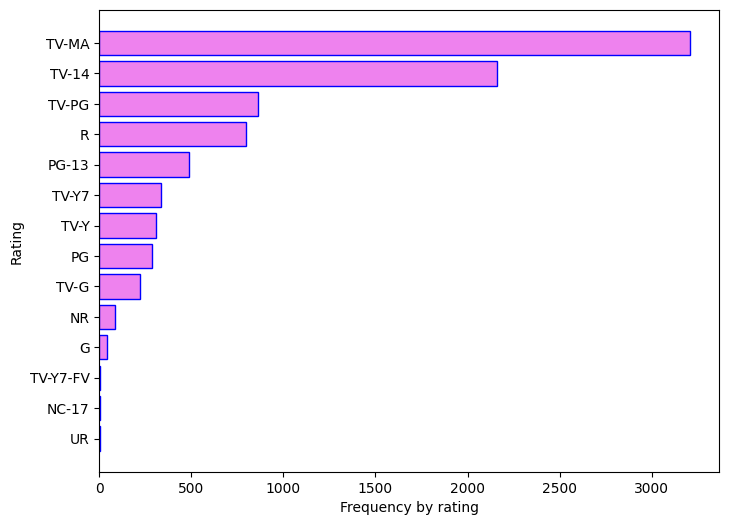

In [183]:
df_rating = df_final1.groupby(['rating']).agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False)
plt.figure(figsize=(8,6))
plt.barh(df_rating[::-1]['rating'],df_rating[::-1]["title"],color=['violet'],edgecolor=['blue'])
plt.xlabel('Frequency by rating')
plt.ylabel('Rating')
plt.show()

In [186]:
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,duration_copy,release_Date
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90,90,2021-09-25
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,0,2021-09-24


In [217]:
df.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values("title",ascending=False).head(10)

,duration,title
0,1 Season,1793
110,2 Seasons,425
138,3 Seasons,199
210,90 min,152
217,97 min,146
213,93 min,146
214,94 min,146
211,91 min,144
215,95 min,137
216,96 min,130


In [189]:
#number of distinct titles on the basis of duration
df_final1.groupby(['duration']).agg({"title":"nunique"}).reset_index().sort_values('title',ascending=False)

,duration,title
0,1 Season,1793
110,2 Seasons,425
139,3 Seasons,199
210,90,152
214,94,146
213,93,146
217,97,146
211,91,144
215,95,137
216,96,130


In [213]:
df_final1.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False).head(10)

,duration,title
20,80-100,2222
0,1 Season,1793
3,100-120,1672
6,120-150,897
16,50-80,808
11,2 Seasons,425
1,1-50,287
9,150-200,226
13,3 Seasons,199
14,4 Seasons,95


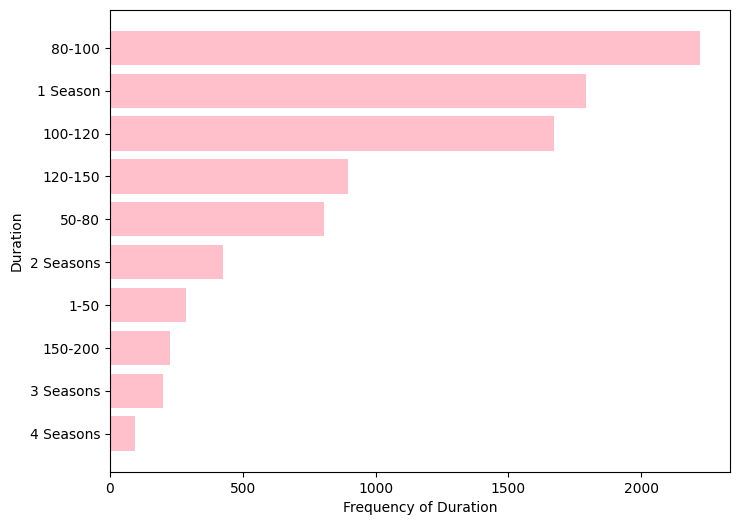

In [214]:
df_duration = df_final1.groupby(['duration']).agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False).head(10)
plt.figure(figsize=(8,6))
plt.barh(df_duration[::-1]['duration'],df_duration[::-1]['title'],color='pink')
plt.xlabel('Frequency of Duration')
plt.ylabel('Duration')
plt.show()

In [241]:
df_final1['month'] = df_final1['release_Date'].dt.month
df_final1['year'] = df_final1['release_Date'].dt.year
df_final1['week_added'] = df_final1['release_Date'].dt.week
df_final1.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,release_Date,month,year,weak_added,week_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,80-100,2021-09-25,9,2021,5,5
1,Blood & Water,Ama Qamata,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,2021,4,4
2,Blood & Water,Ama Qamata,Unknown Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,2021,4,4
3,Blood & Water,Ama Qamata,Unknown Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,2021,4,4
4,Blood & Water,Khosi Ngema,Unknown Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons,2021-09-24,9,2021,4,4


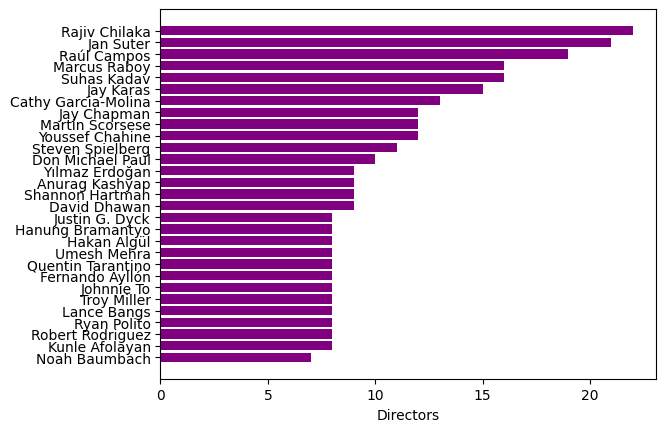

In [248]:
df_direcor = df_final1.groupby(['Directors']).agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False)[1:30]
plt.barh(df_direcor[::-1]['Directors'],df_direcor[::-1]['title'],color='purple')
plt.xlabel("Frequency of the directors")
plt.xlabel("Directors")
plt.show()

Director **Rajiv Chilaka** made hightest movies in the `netflix`

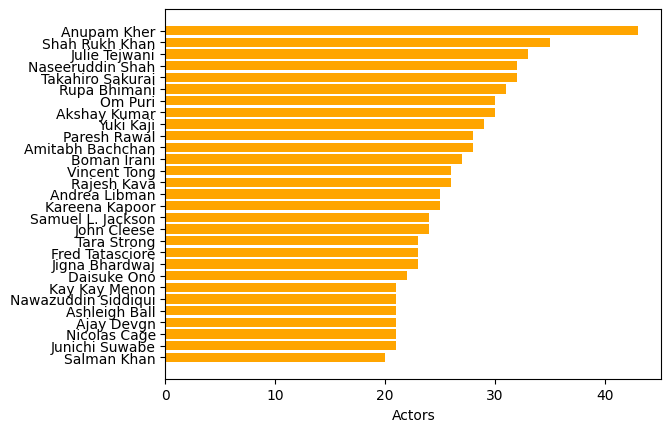

In [236]:
df_actor = df_final1.groupby(['Actors']).agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False)[1:30]
plt.barh(df_actor[::-1]['Actors'],df_actor[::-1]['title'],color='orange')
plt.xlabel("Frequency of the actors")
plt.xlabel("Actors")
plt.show()

Anupam Kher,SRK,Julie Tejwani, Naseeruddin Shah and Takahiro Sakurai occupy the top stop in Most
Watched content.


In [237]:
#number of distinct titles on the basis of year
df_final1.groupby(['year']).agg({"title":"nunique"})

,title
year,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,432


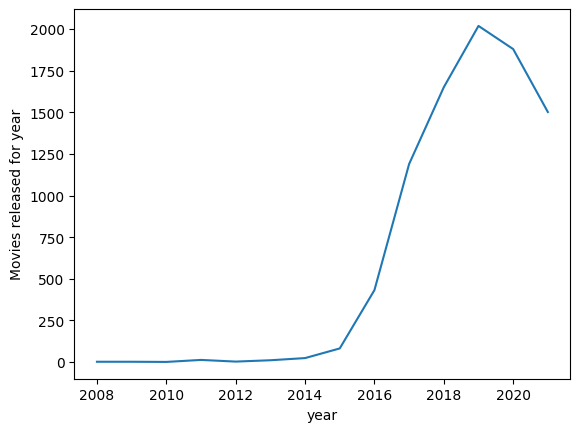

In [238]:
df_year = df_final1.groupby(['year']).agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False)
sns.lineplot(df_year,x='year',y='title')
plt.ylabel("Movies released for year")
plt.xlabel("year")
plt.show()

It is clear from the year *2015* there is gradual increase in content in **Netflix**

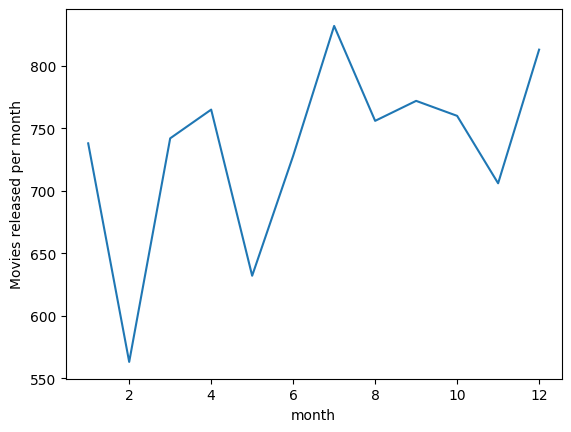

In [240]:
df_month = df_final1.groupby(['month']).agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False)
sns.lineplot(df_year,x='month',y='title')
plt.ylabel("Movies released per month")
plt.xlabel("month")
plt.show()

**October**, **December** and **January** are the holiday months so there us high release in content.



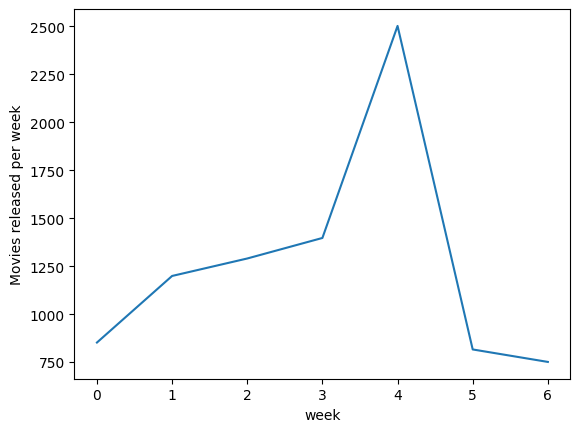

In [245]:
df_week = df_final1.groupby(['week_added']).agg({'title':'nunique'}).reset_index()
sns.lineplot(df_week,x='week_added',y='title')
plt.ylabel("Movies released per week")
plt.xlabel("week")
plt.show()

4Th week is the most content released week of the month.

From the above data it is clear that neflix has increased the content gradually in the years 2017-18 and it peaked in the year 2019-20, Which is the year covid hit hit the world. Moreover, US India and canada are the key content creaters of the netflix. In the Netflix movies are around 70% and TV shows are around 30%.